## Using Fiona to manipuate shapefiles and do spatial analysis
Fiona is an excellant tool for spatial manipulation. This session show you how to use fiona to read shapefile and metadata, use Shapely and Fiona to do spatial analysis, and and write shapefiles. These libraries are essentially wrappers for GEOS and OGR, respectively, which provide clean, Pythonic interfaces for performing the processing, while still keeping the performance capabilities of the underlying libraries.

Fiona is used for reading and writing vector files (here we’re using Shapefiles), while Shapely is used for doing the manipulation and analysis of the geometric objects.

This session will include some major sections, 

1. Read metadata, attributes, geometry of features in shapfile using fiona

1. Create shapefile based on the longitude and latitude 

1. Convert the projection of shapefiles using pyproj

1. Do buffer analysis using fiona+shapely

1. Do intersection of point feature class and polygon feature class

References:

Pandas Tutorial, https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

Fiona Manual, http://toblerity.org/fiona/manual.html

Shapely Manual, http://toblerity.org/shapely/manual.html


AZAVEA Research Blog, Using Shapely and Fiona to Locate High-Risk Traffic Areas, https://www.azavea.com/blog/2016/10/05/philippines-road-safety-using-shapely-fiona-locate-high-risk-traffic-areas/


### 1. Read the metadata of shapefiles using fiona

In [1]:
# get the meta data of shapefile, such as spatial reference, field names, etc
import fiona
from fiona.crs import to_string
from shapely.geometry import mapping, shape


census_shp = 'data/philadelphia-census-tract.gpkg'

with fiona.open(census_shp) as nb_lyr:
    driver = nb_lyr.driver # the driver of the shapefile
    schema = nb_lyr.schema  #schema of shapefile
    crs = nb_lyr.crs   # coordinate reference system of the shapefile
    meta = nb_lyr.meta # more details about the metadata of the shapefile
    

Let's look at the metadata:

In [2]:

print ('The driver is:', driver)
print ('The schema is:', schema)
print ('The coordinate reference system is:', crs)
print ('the metadata is:', meta)


The driver is: GPKG
The schema is: {'properties': OrderedDict([('STATEFP', 'str'), ('COUNTYFP', 'str'), ('TRACTCE', 'str'), ('GEOID', 'str'), ('NAME_x', 'str'), ('NAMELSAD', 'str'), ('MTFCC', 'str'), ('FUNCSTAT', 'str'), ('ALAND', 'int'), ('AWATER', 'int'), ('INTPTLAT', 'str'), ('INTPTLON', 'str'), ('NAME_y', 'str'), ('GEO_ID', 'str'), ('white_popu', 'str'), ('non-hispan', 'str'), ('black_popu', 'str'), ('asian_popu', 'str'), ('hispanic_p', 'str'), ('total_popu', 'str'), ('median_hou', 'str'), ('per_capita', 'str'), ('built_age', 'str'), ('less_highs', 'str'), ('bachelor', 'str'), ('totaleduca', 'str'), ('male_und18', 'str'), ('female_und', 'str'), ('male65_66', 'str'), ('male67_69', 'str'), ('male70_74', 'str'), ('male75_79', 'str'), ('male80_84', 'str'), ('male85_', 'str'), ('fema_65_66', 'str'), ('fema_67_69', 'str'), ('fema70_74', 'str'), ('fema75_79', 'str'), ('fema80_84', 'str'), ('fema85_', 'str'), ('state', 'str'), ('county', 'str'), ('tract', 'str')]), 'geometry': 'MultiPolygo

In [3]:
crs

{'proj': 'lcc',
 'lat_0': 39.3333333333333,
 'lon_0': -77.75,
 'lat_1': 40.9666666666667,
 'lat_2': 39.9333333333333,
 'x_0': 600000,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

Let's print the geometry and attribute of the features in shapefile

In [4]:
with fiona.open(census_shp) as nb_lyr:
    for i, feat in enumerate(nb_lyr):
        # attribute of the neighborhood features
        attr = feat['properties']
        name = attr['TRACTCE']  #you can find other attribute based on the metadata of the shapefile
        print ('The neighborhod is:', name)

        # get the geometry of the polygon feature
        geom = feat['geometry']
        print ('geom is:', geom)
        
        # Limit number of geometries printed
        if i > 4: break


The neighborhod is: 014500
geom is: {'type': 'MultiPolygon', 'coordinates': [[[(2696627.3147124136, 244448.1200176636), (2696698.9070836296, 244968.8253825209), (2696738.674897288, 245246.60600398478), (2696769.502487294, 245475.65300084336), (2696798.592189442, 245687.52020933514), (2696848.044093481, 246045.76303767413), (2696952.495544389, 246030.98098054755), (2697101.9493675977, 246011.329269212), (2697290.2537621344, 245986.26303894527), (2697440.311348299, 245965.17337954626), (2697566.1603939557, 245947.38000019366), (2697787.433755346, 245916.72925008112), (2697995.7467623292, 245888.24936099595), (2698099.876616488, 245874.920384237), (2698218.9499536534, 245858.75266641527), (2698438.8459338443, 245827.33818014764), (2698376.8147468665, 245269.00682389812), (2698341.8787740185, 244961.116990878), (2698316.8410962285, 244745.3583106844), (2698257.349367031, 244224.27534939174), (2698200.452871065, 243719.66900966756), (2697979.99988346, 243750.3408427744), (2697756.7352658333

We can convert the dictionary `geom` variable into a shapely Polygon object using shapely. Here is one example of using shapely to deal with the geometry of features in shapefile. 

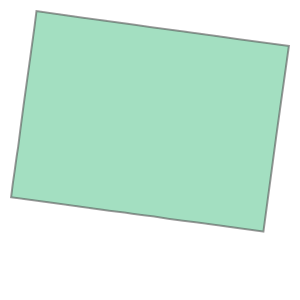

In [5]:
# shape is a function in shapely, imported above with `from shapely.geometry import shape`
shape(geom)

### create a buffer of the shape

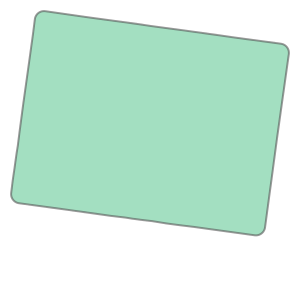

In [6]:
buff_geom = shape(geom).buffer(100)
buff_geom
# mapping(shape(point['geometry']).buffer(5.0))

## 2. Create shapefile based on the longitude and latitude information in the csvfile.

Using pandas to read the csv file and create shapefile based on the longitude and latitude. Pandas is just like MS Excel, it makes dealing with spreadsheet super easy. Let get started! 

Reference:

https://www.tutorialspoint.com/python_pandas/index.htm

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

### 2.1 Let first read the csv file into dataframe using pandas

Read the csv file using pandas

In [7]:
import pandas as pd

# read the csv file and create shapefile
coffee_shop_csv = 'data/cambridge_coffee_shops.csv'
coffee_shop_df = pd.read_csv(coffee_shop_csv)


Print the first 5 records of the dataframe, this will help you know the structure of the dataframe

In [8]:
# this will print the first 5 records of the data frame
coffee_shop_df.head()

,id,name,address,city,state,zip,lat,lon
0,1,1369 Coffee House,1369 Cambridge St,Cambridge,MA,2139,42.373695,-71.100440
1,2,1369 Coffee House,757 Massachusetts Ave,Cambridge,MA,2139,42.366432,-71.105430
2,3,Aceituna Cafe,605 W Kendall St,Cambridge,MA,2142,42.364370,-71.081924
3,4,Al's Deli Cafe-Cambridge,1354 Massachusetts Ave,Cambridge,MA,2138,42.373238,-71.118340
4,5,Algiers Coffee House,40 Brattle St # 3,Cambridge,MA,2138,42.373840,-71.121380


We can create a shapefile easily using Geopandas

In [9]:
import geopandas as gpd
import pandas as pd

# crs = {'init': 'epsg:4326'} #http://www.spatialreference.org/ref/epsg/2263/
crs = "EPSG:4326" #http://www.spatialreference.org/ref/epsg/2263/

# create a geo-dataframe
points_gdf = gpd.GeoDataFrame(coffee_shop_df, crs=crs, \
                geometry=gpd.points_from_xy(coffee_shop_df["lon"], coffee_shop_df["lat"]))

# save the geo-dataframe as a shapefile
points_gdf.to_file("output/cambridge_coffee_shops.gpkg", driver = "GPKG")


/home/lee/miniconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
/home/lee/miniconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Now do the same thing using Fiona.


In [10]:
from shapely.geometry import Point, mapping

# prepare the schema and crs of the output shapefile
schema = {
    'geometry': 'Point',
    'properties': {
        'id': 'str: 20',
        'name': 'str: 20',
        'address': 'str: 20',
        'city': 'str: 20',
        'state':'str: 20',
        'zip': 'str: 7'
    }
}

crs = {'init': u'epsg:4326'}

# The output shapefile
coffee_shop_shp = "output/cambridge_coffee_shops2.gpkg"

with fiona.open(coffee_shop_shp, "w", driver = "GPKG", crs = crs, schema=schema) as output:
    for row in coffee_shop_df.iterrows():
        lon = row[1][7]
        lat = row[1][6]
        
        id_ = row[1][0]
        name = row[1][1]
        address = row[1][2]
        city = row[1][3]
        state = row[1][4]
        zipcode = row[1][5]
        
        point = Point(float(lon), float(lat))
        output.write({'properties':{'id': id_,
                                    'name': name,
                                    'address': address,
                                    'city': city,
                                    'state': state,
                                    'zip': zipcode
                                    },
                      'geometry': mapping(point)
                     })
        
print (f"You have successfully exported {coffee_shop_shp}")


You have successfully exported output/cambridge_coffee_shops2.gpkg


### 2.2 Change the projection of the point shapefile

We will use Pyproj to change the projection of the shapefile

In [11]:
import numpy as np
from pyproj import Transformer, transform


transformer = Transformer.from_crs(2263, 4326)

x_coords = 80481
y_coords = 224831

transformer = Transformer.from_crs(2263, 4326)
transformer.transform(x_coords, y_coords)

(40.73759277624479, -77.26199234360791)

### 2.3. Convert the shapefile in a local projection of Massachusetts, unit is feet
The epsg code of Massachusetts is 6492. For more information about the projection and the epsg code can be find here, http://spatialreference.org/ref/epsg/?search=massachusetts&srtext=Search

In [12]:
import pyproj
from itertools import repeat
import sys
import time
from pyproj import Transformer


transformer = Transformer.from_crs(4326, 6492)
crs = {'init': 'epsg:6492'}

# coffee_shop_shp = 'output/cambridge_coffee_shops2.shp' 
coffee_shop_shp_reproj = "output/cambridge_coffee_shops2_massproj.gpkg"


# write the reprojected point feature to shapefile
with fiona.open(coffee_shop_shp) as source:
    schema = source.schema
    
    with fiona.open(coffee_shop_shp_reproj, "w", driver=source.driver, crs=crs,schema=schema) as dest:
        for feat in source:
            feat_geom = feat['geometry']
            data = feat['properties']
            coordinates = feat_geom['coordinates']
            print(coordinates)
            
            # Transform the coordinates of every ring.
            reproj_coords = transformer.transform(coordinates[1], coordinates[0])
            
            # copy the geom object, but update the reprojected coordinate
            reproj_geom = feat_geom
            reproj_geom['coordinates'] = reproj_coords
            
            dest.write({'geometry': mapping(shape(reproj_geom)),'properties': data})
            

(-71.10044, 42.373695)
(-71.10543, 42.366432)
(-71.081924, 42.36437)
(-71.11834, 42.373238)
(-71.12138, 42.37384)
(-71.091286, 42.36342)
(-71.08602, 42.36341)
(-71.14083, 42.387756)
(-71.090858, 42.366606)
(-71.12067, 42.37198)
(-71.11313, 42.374096)
(-71.12708, 42.39454)
(-71.1157, 42.371605)
(-71.11851, 42.38885)
(-71.09102, 42.37246)
(-71.099236, 42.36276)
(-71.12187, 42.375237)
(-71.121185, 42.37364)
(-71.11014, 42.36896)
(-71.12072, 42.374268)
(-71.124954, 42.37409)
(-71.1095, 42.374847)
(-71.08831, 42.36659)
(-71.08262, 42.362)
(-71.11892, 42.38863)
(-71.076715, 42.36858)
(-71.093704, 42.372818)
(-71.11141, 42.369423)
(-71.14297, 42.389206)
(-71.094, 42.36653)
(-71.13211, 42.398865)
(-71.07953, 42.37242)
(-71.14183, 42.39465)
(-71.1415, 42.387127)
(-71.12106, 42.37413)
(-71.10325, 42.365105)
(-71.12099, 42.371624)
(-71.11589, 42.36088)
(-71.0942, 42.359676)
(-71.12099, 42.371624)
(-71.10432, 42.370617)
(-71.093605, 42.366386)
(-71.13474, 42.402267)
(-71.114914, 42.37314)
(-71.142

### Reproject the traffic accident shapefile
Here are a few tricks to try out if you want to optimize your transformations.
https://pyproj4.github.io/pyproj/stable/advanced_examples.html#optimize-transformations

In [13]:
import time

t0 = time.time()
traffic_accident = "data/crash_data_collision_crash_2007_2017.gpkg"

layer = fiona.open(traffic_accident)
crs = layer.crs
schema = layer.schema

for feat in layer:
    feat_geom = feat['geometry']
    coordinates = feat_geom['coordinates']

print(time.time() - t0)

5.657017707824707


Check the coordinate reference system of the shapefile

### Convert the car crash shapefile projection to the same project with the census tract

In [14]:
import pyproj
from itertools import repeat
import sys
import time
from pyproj import Transformer

# the name of the ouput reprojected shapefile
traffic_accident_reproj = "output/crash_data_collision_crash_2007_2017_reproj.gpkg"
transformer = Transformer.from_crs(4326, 2272)

# write the reprojected point feature to shapefile
with fiona.open(traffic_accident) as source:
    crs={'init': 'epsg:2272'}
    schema = source.schema
    
    with fiona.open(traffic_accident_reproj, "w", driver=source.driver, \
                    crs=crs,schema=schema) as dest:
        for feat in source:
            feat_geom = feat['geometry']
            data = feat['properties']
            
            coordinates = feat_geom['coordinates']

            # Transform the coordinates of every ring.
            reproj_coords = transformer.transform(coordinates[1], coordinates[0])
            
            reproj_geom = feat_geom
            reproj_geom['coordinates'] = reproj_coords
            
            dest.write({'geometry': mapping(shape(reproj_geom)),'properties': data})
            

You may find it slower than GeoPandas. (It took over an hour to run on my laptop.) This is because the script uses a `for... loop` here and does the transform one by one. There are several tricks to increase the efficiency, like using numpy array. We're not going to worry about code efficiency here. If you interested, you can also check the implementation in GeoPandas: https://github.com/geopandas/geopandas

## 3. R-tree for overlay of two shapefile

The core idea behind the `R-tree` is to form a tree-like data structure where nearby objects are grouped together, and their geographical extent (minimum bounding box) is inserted into the data structure (i.e. R-tree). This bounding box then represents the whole group of geometries as one level (typically called as “page” or “node”) in the data structure.


#### Build and fill Rtree
First step is to build the Rtree on the point feature. If you have question about which shapefile should be used as base for the Rtree, a tip is to use the shapefile has more features.

In [15]:
import rtree
import fiona
import os, os.path
from statistics import median
from shapely.geometry import shape
from shapely.ops import transform
from functools import partial
import pyproj
import time

neighborhood_shp = 'data/philadelphia-census-tract.gpkg'
traffic_accident_reproj = 'output/crash_data_collision_crash_2007_2017_reproj.gpkg'
output_poly = 'output/census-traffic-accident.gpkg'


t0 = time.time()
pnt_lyr = fiona.open(traffic_accident_reproj)
# create an empty spatial index object
index = rtree.index.Index()


# populate the spatial index, the polygon features
i = 0
for fid, feature in pnt_lyr.items():
    i = i + 1
    if i % 10000 == 0: print (i)
    geometry = shape(feature['geometry'])
    
    # add a buffer in order to create a r-tree
    geometry_buffered = geometry.buffer(10) 
    geotype = feature['geometry']['type']
    
    index.insert(fid, geometry_buffered.bounds)
    

10000
20000
30000
40000
50000
60000
70000


In [16]:
pnt_lyr.crs
# loop all polygons and assign GVI values
with fiona.open(neighborhood_shp) as polygon_lyr:
    schema = polygon_lyr.schema.copy()
    schema['properties']['AcciNum']='float' 
    input_crs = polygon_lyr.crs

In [17]:
polygon_lyr.crs
pnt_lyr.crs

{'init': 'epsg:2272'}

#### Start the overlay based on the built rtree
Based on the built Rtree to loop all features in the polygon and calculate the attribute

In [18]:
# loop all polygons and assign GVI values
with fiona.open(neighborhood_shp) as polygon_lyr:
    schema = polygon_lyr.schema.copy()
    schema['properties']['AcciNum']='float' 
    input_crs = polygon_lyr.crs
    
    # write the intersected point into the new shapefile
    with fiona.open(output_poly, "w", "GPKG", schema, input_crs) as output:
        
        # loop the polygon feature
        for idx, featPoly in enumerate(polygon_lyr):
            print('Polygon:', idx)
            geomPoly = shape(featPoly['geometry'])                
            attriPoly = featPoly['properties']
            
            # using the bounding box to find the close but may not intersected point feature
            fids = [int(i) for i in index.intersection(geomPoly.bounds)]
            
            # count the number of accidents
            count = 0
            
            # loop all features in bounding box and then judge if they are intersected
            for fid in fids:
                featPnt = pnt_lyr[fid]
                geomPnt = shape(featPnt['geometry'])
                
                # if the point is intersected with the polygon, then save the point feature into the output shapefile
                if geomPoly.intersects(geomPnt):
                    count = count + 1
            
            attriPoly['AcciNum']=count
            output.write({'geometry': mapping(geomPoly),'properties': attriPoly})
            

Polygon: 0
Polygon: 1
Polygon: 2
Polygon: 3
Polygon: 4
Polygon: 5
Polygon: 6
Polygon: 7
Polygon: 8
Polygon: 9
Polygon: 10
Polygon: 11
Polygon: 12
Polygon: 13
Polygon: 14
Polygon: 15
Polygon: 16
Polygon: 17
Polygon: 18
Polygon: 19
Polygon: 20
Polygon: 21
Polygon: 22
Polygon: 23
Polygon: 24
Polygon: 25
Polygon: 26
Polygon: 27
Polygon: 28
Polygon: 29
Polygon: 30
Polygon: 31
Polygon: 32
Polygon: 33
Polygon: 34
Polygon: 35
Polygon: 36
Polygon: 37
Polygon: 38
Polygon: 39
Polygon: 40
Polygon: 41
Polygon: 42
Polygon: 43
Polygon: 44
Polygon: 45
Polygon: 46
Polygon: 47
Polygon: 48
Polygon: 49
Polygon: 50
Polygon: 51
Polygon: 52
Polygon: 53
Polygon: 54
Polygon: 55
Polygon: 56
Polygon: 57
Polygon: 58
Polygon: 59
Polygon: 60
Polygon: 61
Polygon: 62
Polygon: 63
Polygon: 64
Polygon: 65
Polygon: 66
Polygon: 67
Polygon: 68
Polygon: 69
Polygon: 70
Polygon: 71
Polygon: 72
Polygon: 73
Polygon: 74
Polygon: 75
Polygon: 76
Polygon: 77
Polygon: 78
Polygon: 79
Polygon: 80
Polygon: 81
Polygon: 82
Polygon: 83
Po

In [19]:
featPnt['properties']['crash_year']

2011